In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re

# Membaca Data

In [2]:
df = pd.read_csv('data.csv', encoding = "ISO-8859-1")

# Melihat Data

In [3]:
df

,Tweet,HS,Abusive,HS_Individual,HS_Group,HS_Religion,HS_Race,HS_Physical,HS_Gender,HS_Other,HS_Weak,HS_Moderate,HS_Strong
0,- disaat semua cowok berusaha melacak perhatia...,1,1,1,0,0,0,0,0,1,1,0,0
1,RT USER: USER siapa yang telat ngasih tau elu?...,0,1,0,0,0,0,0,0,0,0,0,0
2,"41. Kadang aku berfikir, kenapa aku tetap perc...",0,0,0,0,0,0,0,0,0,0,0,0
3,USER USER AKU ITU AKU\n\nKU TAU MATAMU SIPIT T...,0,0,0,0,0,0,0,0,0,0,0,0
4,USER USER Kaum cebong kapir udah keliatan dong...,1,1,0,1,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
13164,USER jangan asal ngomong ndasmu. congor lu yg ...,1,1,1,0,0,0,1,0,0,1,0,0
13165,USER Kasur mana enak kunyuk',0,1,0,0,0,0,0,0,0,0,0,0
13166,USER Hati hati bisu :( .g\n\nlagi bosan huft \...,0,0,0,0,0,0,0,0,0,0,0,0
13167,USER USER USER USER Bom yang real mudah terdet...,0,0,0,0,0,0,0,0,0,0,0,0


In [4]:
df.head(15)

,Tweet,HS,Abusive,HS_Individual,HS_Group,HS_Religion,HS_Race,HS_Physical,HS_Gender,HS_Other,HS_Weak,HS_Moderate,HS_Strong
0,- disaat semua cowok berusaha melacak perhatia...,1,1,1,0,0,0,0,0,1,1,0,0
1,RT USER: USER siapa yang telat ngasih tau elu?...,0,1,0,0,0,0,0,0,0,0,0,0
2,"41. Kadang aku berfikir, kenapa aku tetap perc...",0,0,0,0,0,0,0,0,0,0,0,0
3,USER USER AKU ITU AKU\n\nKU TAU MATAMU SIPIT T...,0,0,0,0,0,0,0,0,0,0,0,0
4,USER USER Kaum cebong kapir udah keliatan dong...,1,1,0,1,1,0,0,0,0,0,1,0
5,USER Ya bani taplak dkk \xf0\x9f\x98\x84\xf0\x...,1,1,0,1,0,0,0,0,1,0,1,0
6,deklarasi pilkada 2018 aman dan anti hoax warg...,0,0,0,0,0,0,0,0,0,0,0,0
7,Gue baru aja kelar re-watch Aldnoah Zero!!! pa...,0,1,0,0,0,0,0,0,0,0,0,0
8,Nah admin belanja satu lagi port terbaik nak m...,0,0,0,0,0,0,0,0,0,0,0,0
9,USER Enak lg klo smbil ngewe',0,1,0,0,0,0,0,0,0,0,0,0


In [5]:
df.tail(15)

,Tweet,HS,Abusive,HS_Individual,HS_Group,HS_Religion,HS_Race,HS_Physical,HS_Gender,HS_Other,HS_Weak,HS_Moderate,HS_Strong
13154,Adik tengok sekeliling. Macam mana adik nak ca...,0,0,0,0,0,0,0,0,0,0,0,0
13155,USER USER Makannya w suruh baca APBN ..biar ga...,1,1,1,0,0,0,0,0,1,1,0,0
13156,Presiden Joko Widodo (Jokowi) masuk daftar The...,0,0,0,0,0,0,0,0,0,0,0,0
13157,"USER Pak Recep..............anda salah, itu gu...",1,0,1,0,0,0,0,0,1,1,0,0
13158,Maaf sianu mah cocoknya sama mustafa kemal alm...,0,0,0,0,0,0,0,0,0,0,0,0
13159,Ada 2 buku aktivitas Angry Birds the Movie yan...,0,0,0,0,0,0,0,0,0,0,0,0
13160,[NOSTALGIA DENGAN BUDAYA]; ; nosÂ·talÂ·gia n k...,0,0,0,0,0,0,0,0,0,0,0,0
13161,brengsek itu orang terbuat dr apa bikin gue be...,1,1,1,0,0,0,0,0,1,1,0,0
13162,Kapolda Babi! Biadap dan Bodoh! Gak punya otak...,1,1,0,1,0,0,0,0,1,0,1,0
13163,"Orang Yahudi, Kristen dan Muslim yang belum pe...",0,0,0,0,0,0,0,0,0,0,0,0


# Melihat informasi data

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13169 entries, 0 to 13168
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Tweet          13169 non-null  object
 1   HS             13169 non-null  int64 
 2   Abusive        13169 non-null  int64 
 3   HS_Individual  13169 non-null  int64 
 4   HS_Group       13169 non-null  int64 
 5   HS_Religion    13169 non-null  int64 
 6   HS_Race        13169 non-null  int64 
 7   HS_Physical    13169 non-null  int64 
 8   HS_Gender      13169 non-null  int64 
 9   HS_Other       13169 non-null  int64 
 10  HS_Weak        13169 non-null  int64 
 11  HS_Moderate    13169 non-null  int64 
 12  HS_Strong      13169 non-null  int64 
dtypes: int64(12), object(1)
memory usage: 1.3+ MB


# Melihat jumlah data

In [7]:
df.shape

(13169, 13)

# Mengatasi Data Duplikat

In [8]:
df.drop_duplicates(inplace=True)

In [9]:
df.shape

(13044, 13)

In [10]:
comments_df=df

# Cleansing/Membersihkan Kolom

In [11]:
comments_df.columns

Index(['Tweet', 'HS', 'Abusive', 'HS_Individual', 'HS_Group', 'HS_Religion',
       'HS_Race', 'HS_Physical', 'HS_Gender', 'HS_Other', 'HS_Weak',
       'HS_Moderate', 'HS_Strong'],
      dtype='object')

In [12]:
comments_df.rename(columns={
        'Abusive': 'HS_Abusive'
}, inplace=True)

In [13]:
comments_df.columns

Index(['Tweet', 'HS', 'HS_Abusive', 'HS_Individual', 'HS_Group', 'HS_Religion',
       'HS_Race', 'HS_Physical', 'HS_Gender', 'HS_Other', 'HS_Weak',
       'HS_Moderate', 'HS_Strong'],
      dtype='object')

# Mengatasi Missing Value

In [14]:
df.isnull()

,Tweet,HS,HS_Abusive,HS_Individual,HS_Group,HS_Religion,HS_Race,HS_Physical,HS_Gender,HS_Other,HS_Weak,HS_Moderate,HS_Strong
0,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
13164,False,False,False,False,False,False,False,False,False,False,False,False,False
13165,False,False,False,False,False,False,False,False,False,False,False,False,False
13166,False,False,False,False,False,False,False,False,False,False,False,False,False
13167,False,False,False,False,False,False,False,False,False,False,False,False,False


In [15]:
df.isnull().sum()

Tweet            0
HS               0
HS_Abusive       0
HS_Individual    0
HS_Group         0
HS_Religion      0
HS_Race          0
HS_Physical      0
HS_Gender        0
HS_Other         0
HS_Weak          0
HS_Moderate      0
HS_Strong        0
dtype: int64

# Memilih Data (Data Selecting)

In [16]:
subset = df[['Tweet', 'HS_Abusive']]

In [17]:
subset.head()

,Tweet,HS_Abusive
0,- disaat semua cowok berusaha melacak perhatia...,1
1,RT USER: USER siapa yang telat ngasih tau elu?...,1
2,"41. Kadang aku berfikir, kenapa aku tetap perc...",0
3,USER USER AKU ITU AKU\n\nKU TAU MATAMU SIPIT T...,0
4,USER USER Kaum cebong kapir udah keliatan dong...,1


In [18]:
subset.tail()

,Tweet,HS_Abusive
13164,USER jangan asal ngomong ndasmu. congor lu yg ...,1
13165,USER Kasur mana enak kunyuk',1
13166,USER Hati hati bisu :( .g\n\nlagi bosan huft \...,0
13167,USER USER USER USER Bom yang real mudah terdet...,0
13168,"USER Mana situ ngasih("": itu cuma foto ya kuti...",1


In [19]:
df

,Tweet,HS,HS_Abusive,HS_Individual,HS_Group,HS_Religion,HS_Race,HS_Physical,HS_Gender,HS_Other,HS_Weak,HS_Moderate,HS_Strong
0,- disaat semua cowok berusaha melacak perhatia...,1,1,1,0,0,0,0,0,1,1,0,0
1,RT USER: USER siapa yang telat ngasih tau elu?...,0,1,0,0,0,0,0,0,0,0,0,0
2,"41. Kadang aku berfikir, kenapa aku tetap perc...",0,0,0,0,0,0,0,0,0,0,0,0
3,USER USER AKU ITU AKU\n\nKU TAU MATAMU SIPIT T...,0,0,0,0,0,0,0,0,0,0,0,0
4,USER USER Kaum cebong kapir udah keliatan dong...,1,1,0,1,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
13164,USER jangan asal ngomong ndasmu. congor lu yg ...,1,1,1,0,0,0,1,0,0,1,0,0
13165,USER Kasur mana enak kunyuk',0,1,0,0,0,0,0,0,0,0,0,0
13166,USER Hati hati bisu :( .g\n\nlagi bosan huft \...,0,0,0,0,0,0,0,0,0,0,0,0
13167,USER USER USER USER Bom yang real mudah terdet...,0,0,0,0,0,0,0,0,0,0,0,0


# Mengekstrak Data (Data Extracting)

In [20]:
prom = df.loc[1000]
prom

Tweet            USER Blm jd gub aja sdh nabrak etika, gmn kl m...
HS                                                               1
HS_Abusive                                                       0
HS_Individual                                                    1
HS_Group                                                         0
HS_Religion                                                      0
HS_Race                                                          0
HS_Physical                                                      0
HS_Gender                                                        0
HS_Other                                                         1
HS_Weak                                                          1
HS_Moderate                                                      0
HS_Strong                                                        0
Name: 1000, dtype: object

# Slicing Data

In [21]:
df_filter = df[df['HS_Abusive'] > 0]
df_filter = df_filter[['Tweet', 'HS_Abusive']]
df_filter

,Tweet,HS_Abusive
0,- disaat semua cowok berusaha melacak perhatia...,1
1,RT USER: USER siapa yang telat ngasih tau elu?...,1
4,USER USER Kaum cebong kapir udah keliatan dong...,1
5,USER Ya bani taplak dkk \xf0\x9f\x98\x84\xf0\x...,1
7,Gue baru aja kelar re-watch Aldnoah Zero!!! pa...,1
...,...,...
13161,brengsek itu orang terbuat dr apa bikin gue be...,1
13162,Kapolda Babi! Biadap dan Bodoh! Gak punya otak...,1
13164,USER jangan asal ngomong ndasmu. congor lu yg ...,1
13165,USER Kasur mana enak kunyuk',1


In [22]:
df_filter.shape

(5005, 2)

In [23]:
df_filter.head(15)

,Tweet,HS_Abusive
0,- disaat semua cowok berusaha melacak perhatia...,1
1,RT USER: USER siapa yang telat ngasih tau elu?...,1
4,USER USER Kaum cebong kapir udah keliatan dong...,1
5,USER Ya bani taplak dkk \xf0\x9f\x98\x84\xf0\x...,1
7,Gue baru aja kelar re-watch Aldnoah Zero!!! pa...,1
9,USER Enak lg klo smbil ngewe',1
10,"Setidaknya gw punya jari tengah buat lu, sebel...",1
11,USER USER USER USER BANCI KALENG MALU GA BISA ...,1
14,USER Bu guru enakan jadi jablay atau guru esde...,1
15,USER USER USER USER USER USER Lawan bicara gw ...,1


In [24]:
df_filter.tail(15)

,Tweet,HS_Abusive
13139,USER Apa ngoceh Onta yaman',1
13140,"Ajarkan cinta, hentikan menabikan Muhammad bej...",1
13141,USER Paling belakang apa yg termutakhir? Hahah...,1
13143,USER Wkwkwkw ccd ahhhh',1
13144,USER babi lo jaringan cacat',1
13145,"USER Goblok, bayangin aja kalo janin itu lu (y...",1
13146,USER USER kbnykn minum kencing onta bsrta sper...,1
13151,USER USER Komnasham sontoloyo',1
13152,Rizieq shihab fpi jancok asu kontol tempek anj...,1
13155,USER USER Makannya w suruh baca APBN ..biar ga...,1


In [25]:
df_filter = df[df['HS_Abusive'].isin([0, 1])]
df_filter = df_filter[['Tweet', 'HS_Abusive']]
df_filter

,Tweet,HS_Abusive
0,- disaat semua cowok berusaha melacak perhatia...,1
1,RT USER: USER siapa yang telat ngasih tau elu?...,1
2,"41. Kadang aku berfikir, kenapa aku tetap perc...",0
3,USER USER AKU ITU AKU\n\nKU TAU MATAMU SIPIT T...,0
4,USER USER Kaum cebong kapir udah keliatan dong...,1
...,...,...
13164,USER jangan asal ngomong ndasmu. congor lu yg ...,1
13165,USER Kasur mana enak kunyuk',1
13166,USER Hati hati bisu :( .g\n\nlagi bosan huft \...,0
13167,USER USER USER USER Bom yang real mudah terdet...,0


# Mengoperasikan Function

In [26]:
def indicator(x):
    if x < 1:
        return "Non Abusive"
    else:
        return "Abusive"
    

In [27]:
df_filter["Word_indicator"] = df_filter["HS_Abusive"].apply(indicator)

In [28]:
df_filter

,Tweet,HS_Abusive,Word_indicator
0,- disaat semua cowok berusaha melacak perhatia...,1,Abusive
1,RT USER: USER siapa yang telat ngasih tau elu?...,1,Abusive
2,"41. Kadang aku berfikir, kenapa aku tetap perc...",0,Non Abusive
3,USER USER AKU ITU AKU\n\nKU TAU MATAMU SIPIT T...,0,Non Abusive
4,USER USER Kaum cebong kapir udah keliatan dong...,1,Abusive
...,...,...,...
13164,USER jangan asal ngomong ndasmu. congor lu yg ...,1,Abusive
13165,USER Kasur mana enak kunyuk',1,Abusive
13166,USER Hati hati bisu :( .g\n\nlagi bosan huft \...,0,Non Abusive
13167,USER USER USER USER Bom yang real mudah terdet...,0,Non Abusive


In [29]:
comments_df["Word_indicator"] = comments_df["HS_Abusive"].apply(lambda x: 'Non Abusive' if x < 1 else 'Abusive')

In [30]:
comments_df

,Tweet,HS,HS_Abusive,HS_Individual,HS_Group,HS_Religion,HS_Race,HS_Physical,HS_Gender,HS_Other,HS_Weak,HS_Moderate,HS_Strong,Word_indicator
0,- disaat semua cowok berusaha melacak perhatia...,1,1,1,0,0,0,0,0,1,1,0,0,Abusive
1,RT USER: USER siapa yang telat ngasih tau elu?...,0,1,0,0,0,0,0,0,0,0,0,0,Abusive
2,"41. Kadang aku berfikir, kenapa aku tetap perc...",0,0,0,0,0,0,0,0,0,0,0,0,Non Abusive
3,USER USER AKU ITU AKU\n\nKU TAU MATAMU SIPIT T...,0,0,0,0,0,0,0,0,0,0,0,0,Non Abusive
4,USER USER Kaum cebong kapir udah keliatan dong...,1,1,0,1,1,0,0,0,0,0,1,0,Abusive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13164,USER jangan asal ngomong ndasmu. congor lu yg ...,1,1,1,0,0,0,1,0,0,1,0,0,Abusive
13165,USER Kasur mana enak kunyuk',0,1,0,0,0,0,0,0,0,0,0,0,Abusive
13166,USER Hati hati bisu :( .g\n\nlagi bosan huft \...,0,0,0,0,0,0,0,0,0,0,0,0,Non Abusive
13167,USER USER USER USER Bom yang real mudah terdet...,0,0,0,0,0,0,0,0,0,0,0,0,Non Abusive


# Melakukan Cleansing Text Memakai Regex Dan Pandas

In [31]:
def cleansing(text):
    text = re.sub("[A-Z]{2,}", " ", text)
    text = re.sub(r"[^a-zA-Z0-9]", " ", text)
    text = re.sub(r'\d', "", text)
    return text


In [32]:
comments_df['Text_Clean'] = comments_df.Tweet.apply(cleansing)

In [33]:
df

,Tweet,HS,HS_Abusive,HS_Individual,HS_Group,HS_Religion,HS_Race,HS_Physical,HS_Gender,HS_Other,HS_Weak,HS_Moderate,HS_Strong,Word_indicator,Text_Clean
0,- disaat semua cowok berusaha melacak perhatia...,1,1,1,0,0,0,0,0,1,1,0,0,Abusive,disaat semua cowok berusaha melacak perhatia...
1,RT USER: USER siapa yang telat ngasih tau elu?...,0,1,0,0,0,0,0,0,0,0,0,0,Abusive,siapa yang telat ngasih tau elu edan sa...
2,"41. Kadang aku berfikir, kenapa aku tetap perc...",0,0,0,0,0,0,0,0,0,0,0,0,Non Abusive,Kadang aku berfikir kenapa aku tetap percay...
3,USER USER AKU ITU AKU\n\nKU TAU MATAMU SIPIT T...,0,0,0,0,0,0,0,0,0,0,0,0,Non Abusive,n n
4,USER USER Kaum cebong kapir udah keliatan dong...,1,1,0,1,1,0,0,0,0,0,1,0,Abusive,Kaum cebong kapir udah keliatan dongoknya ...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13164,USER jangan asal ngomong ndasmu. congor lu yg ...,1,1,1,0,0,0,1,0,0,1,0,0,Abusive,jangan asal ngomong ndasmu congor lu yg sek...
13165,USER Kasur mana enak kunyuk',0,1,0,0,0,0,0,0,0,0,0,0,Abusive,Kasur mana enak kunyuk
13166,USER Hati hati bisu :( .g\n\nlagi bosan huft \...,0,0,0,0,0,0,0,0,0,0,0,0,Non Abusive,Hati hati bisu g n nlagi bosan huft xf ...
13167,USER USER USER USER Bom yang real mudah terdet...,0,0,0,0,0,0,0,0,0,0,0,0,Non Abusive,Bom yang real mudah terdeteksi bom yan...


In [34]:
df.drop(columns=['Tweet'], inplace=True)

In [35]:
df

,HS,HS_Abusive,HS_Individual,HS_Group,HS_Religion,HS_Race,HS_Physical,HS_Gender,HS_Other,HS_Weak,HS_Moderate,HS_Strong,Word_indicator,Text_Clean
0,1,1,1,0,0,0,0,0,1,1,0,0,Abusive,disaat semua cowok berusaha melacak perhatia...
1,0,1,0,0,0,0,0,0,0,0,0,0,Abusive,siapa yang telat ngasih tau elu edan sa...
2,0,0,0,0,0,0,0,0,0,0,0,0,Non Abusive,Kadang aku berfikir kenapa aku tetap percay...
3,0,0,0,0,0,0,0,0,0,0,0,0,Non Abusive,n n
4,1,1,0,1,1,0,0,0,0,0,1,0,Abusive,Kaum cebong kapir udah keliatan dongoknya ...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13164,1,1,1,0,0,0,1,0,0,1,0,0,Abusive,jangan asal ngomong ndasmu congor lu yg sek...
13165,0,1,0,0,0,0,0,0,0,0,0,0,Abusive,Kasur mana enak kunyuk
13166,0,0,0,0,0,0,0,0,0,0,0,0,Non Abusive,Hati hati bisu g n nlagi bosan huft xf ...
13167,0,0,0,0,0,0,0,0,0,0,0,0,Non Abusive,Bom yang real mudah terdeteksi bom yan...


In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13044 entries, 0 to 13168
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   HS              13044 non-null  int64 
 1   HS_Abusive      13044 non-null  int64 
 2   HS_Individual   13044 non-null  int64 
 3   HS_Group        13044 non-null  int64 
 4   HS_Religion     13044 non-null  int64 
 5   HS_Race         13044 non-null  int64 
 6   HS_Physical     13044 non-null  int64 
 7   HS_Gender       13044 non-null  int64 
 8   HS_Other        13044 non-null  int64 
 9   HS_Weak         13044 non-null  int64 
 10  HS_Moderate     13044 non-null  int64 
 11  HS_Strong       13044 non-null  int64 
 12  Word_indicator  13044 non-null  object
 13  Text_Clean      13044 non-null  object
dtypes: int64(12), object(2)
memory usage: 2.0+ MB


In [37]:
df = df.reindex(columns=["Text_Clean", "HS", "HS_Abusive", "HS_Individual", "HS_Group", "HS_Religion", "HS_Race", "HS_Physical", "HS_Gender", "HS_Other", "HS_Weak", "HS_Moderate", "HS_Strong", "Word_Indicator"])
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13044 entries, 0 to 13168
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Text_Clean      13044 non-null  object 
 1   HS              13044 non-null  int64  
 2   HS_Abusive      13044 non-null  int64  
 3   HS_Individual   13044 non-null  int64  
 4   HS_Group        13044 non-null  int64  
 5   HS_Religion     13044 non-null  int64  
 6   HS_Race         13044 non-null  int64  
 7   HS_Physical     13044 non-null  int64  
 8   HS_Gender       13044 non-null  int64  
 9   HS_Other        13044 non-null  int64  
 10  HS_Weak         13044 non-null  int64  
 11  HS_Moderate     13044 non-null  int64  
 12  HS_Strong       13044 non-null  int64  
 13  Word_Indicator  0 non-null      float64
dtypes: float64(1), int64(12), object(1)
memory usage: 2.0+ MB


In [38]:
df

,Text_Clean,HS,HS_Abusive,HS_Individual,HS_Group,HS_Religion,HS_Race,HS_Physical,HS_Gender,HS_Other,HS_Weak,HS_Moderate,HS_Strong,Word_Indicator
0,disaat semua cowok berusaha melacak perhatia...,1,1,1,0,0,0,0,0,1,1,0,0,NaN
1,siapa yang telat ngasih tau elu edan sa...,0,1,0,0,0,0,0,0,0,0,0,0,NaN
2,Kadang aku berfikir kenapa aku tetap percay...,0,0,0,0,0,0,0,0,0,0,0,0,NaN
3,n n,0,0,0,0,0,0,0,0,0,0,0,0,NaN
4,Kaum cebong kapir udah keliatan dongoknya ...,1,1,0,1,1,0,0,0,0,0,1,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13164,jangan asal ngomong ndasmu congor lu yg sek...,1,1,1,0,0,0,1,0,0,1,0,0,NaN
13165,Kasur mana enak kunyuk,0,1,0,0,0,0,0,0,0,0,0,0,NaN
13166,Hati hati bisu g n nlagi bosan huft xf ...,0,0,0,0,0,0,0,0,0,0,0,0,NaN
13167,Bom yang real mudah terdeteksi bom yan...,0,0,0,0,0,0,0,0,0,0,0,0,NaN


In [39]:
df.drop(columns=['Word_Indicator'], inplace=True)

In [40]:
def process(x):
    if x < 1:
        return "Non Abusive"
    else:
        return "Abusive"

In [41]:
df["Word_indicator"] = df["HS_Abusive"].apply(process)

In [42]:
df

,Text_Clean,HS,HS_Abusive,HS_Individual,HS_Group,HS_Religion,HS_Race,HS_Physical,HS_Gender,HS_Other,HS_Weak,HS_Moderate,HS_Strong,Word_indicator
0,disaat semua cowok berusaha melacak perhatia...,1,1,1,0,0,0,0,0,1,1,0,0,Abusive
1,siapa yang telat ngasih tau elu edan sa...,0,1,0,0,0,0,0,0,0,0,0,0,Abusive
2,Kadang aku berfikir kenapa aku tetap percay...,0,0,0,0,0,0,0,0,0,0,0,0,Non Abusive
3,n n,0,0,0,0,0,0,0,0,0,0,0,0,Non Abusive
4,Kaum cebong kapir udah keliatan dongoknya ...,1,1,0,1,1,0,0,0,0,0,1,0,Abusive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13164,jangan asal ngomong ndasmu congor lu yg sek...,1,1,1,0,0,0,1,0,0,1,0,0,Abusive
13165,Kasur mana enak kunyuk,0,1,0,0,0,0,0,0,0,0,0,0,Abusive
13166,Hati hati bisu g n nlagi bosan huft xf ...,0,0,0,0,0,0,0,0,0,0,0,0,Non Abusive
13167,Bom yang real mudah terdeteksi bom yan...,0,0,0,0,0,0,0,0,0,0,0,0,Non Abusive


In [43]:
df.rename(columns={'Text_Clean': 'Tweet'}, inplace=True)

In [44]:
df

,Tweet,HS,HS_Abusive,HS_Individual,HS_Group,HS_Religion,HS_Race,HS_Physical,HS_Gender,HS_Other,HS_Weak,HS_Moderate,HS_Strong,Word_indicator
0,disaat semua cowok berusaha melacak perhatia...,1,1,1,0,0,0,0,0,1,1,0,0,Abusive
1,siapa yang telat ngasih tau elu edan sa...,0,1,0,0,0,0,0,0,0,0,0,0,Abusive
2,Kadang aku berfikir kenapa aku tetap percay...,0,0,0,0,0,0,0,0,0,0,0,0,Non Abusive
3,n n,0,0,0,0,0,0,0,0,0,0,0,0,Non Abusive
4,Kaum cebong kapir udah keliatan dongoknya ...,1,1,0,1,1,0,0,0,0,0,1,0,Abusive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13164,jangan asal ngomong ndasmu congor lu yg sek...,1,1,1,0,0,0,1,0,0,1,0,0,Abusive
13165,Kasur mana enak kunyuk,0,1,0,0,0,0,0,0,0,0,0,0,Abusive
13166,Hati hati bisu g n nlagi bosan huft xf ...,0,0,0,0,0,0,0,0,0,0,0,0,Non Abusive
13167,Bom yang real mudah terdeteksi bom yan...,0,0,0,0,0,0,0,0,0,0,0,0,Non Abusive


# Bar Chart Plotting

In [45]:
import seaborn as sns

In [46]:
from matplotlib import pyplot as plt
%matplotlib inline

In [47]:
subset = df[['Word_indicator', 'HS_Abusive']]

In [48]:
subset

,Word_indicator,HS_Abusive
0,Abusive,1
1,Abusive,1
2,Non Abusive,0
3,Non Abusive,0
4,Abusive,1
...,...,...
13164,Abusive,1
13165,Abusive,1
13166,Non Abusive,0
13167,Non Abusive,0


In [49]:
df['Word_indicator'].value_counts()

Word_indicator
Non Abusive    8039
Abusive        5005
Name: count, dtype: int64

In [54]:
New_Data = {'Tipe Komentar': ['Abusive', 'Non Abusive'],
          'Jumlah Total': [5005, 8039]}
Output = pd.DataFrame(New_Data)
Output


,Tipe Komentar,Jumlah Total
0,Abusive,5005
1,Non Abusive,8039


In [62]:
import pandas as pd

In [63]:
import seaborn as sns
import matplotlib.pyplot as plt

C:\Users\ASUS\AppData\Local\Temp\ipykernel_21744\3862290550.py:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  figure = sns.barplot(


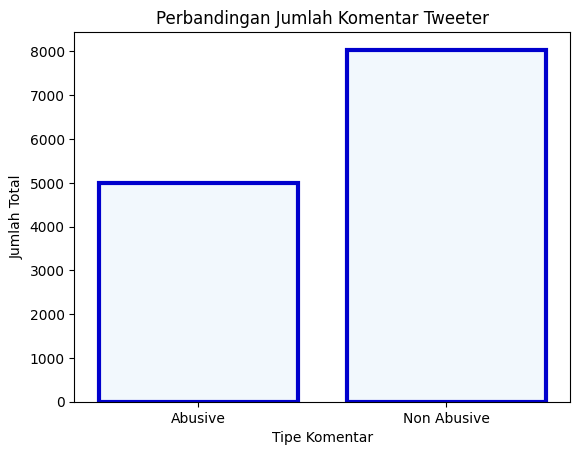

In [69]:
figure = sns.barplot(
    x = Output['Tipe Komentar'],
    y = Output['Jumlah Total'],
    ci=None, color='aliceblue',
    edgecolor='mediumblue', lw=3
    )
plt.title("Perbandingan Jumlah Komentar Tweeter")

#Saving the image result
plt.savefig('Grafik Perbandingan.pdf', bbox_inches = 'tight')